<a href="https://colab.research.google.com/github/shamsulalam1114/Machine_Learning/blob/main/curn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Prediction.csv to Customer-Churn-Prediction.csv


In [4]:
df = pd.read_csv('Customer-Churn-Prediction.csv')


In [5]:
df



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape


(7043, 21)

<Axes: xlabel='count', ylabel='Churn'>

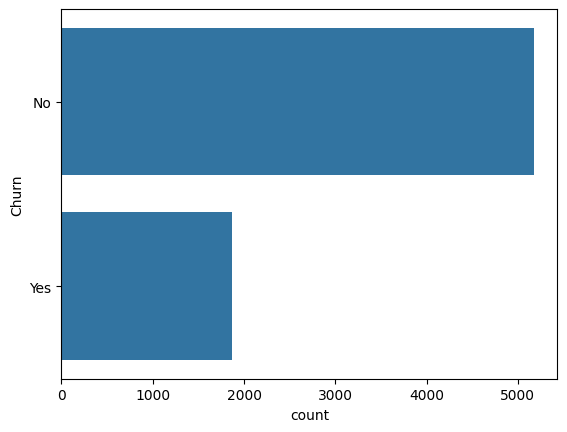

In [7]:
sns.countplot(df['Churn'])


In [9]:
df['Churn'].value_counts()



,count
Churn,
No,5174
Yes,1869


In [10]:
Churned = df[df.Churn == 'Yes'].shape[0]
retained = df[df.Churn == 'No'].shape[0]

In [11]:
ch_per = ((Churned /(Churned+retained)) * 100)
ch_per

26.536987079369588

In [14]:
re_per = ((retained /(Churned+retained)) * 100)
re_per



73.4630129206304

In [15]:
df.isnull().sum()



,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: xlabel='gender', ylabel='count'>

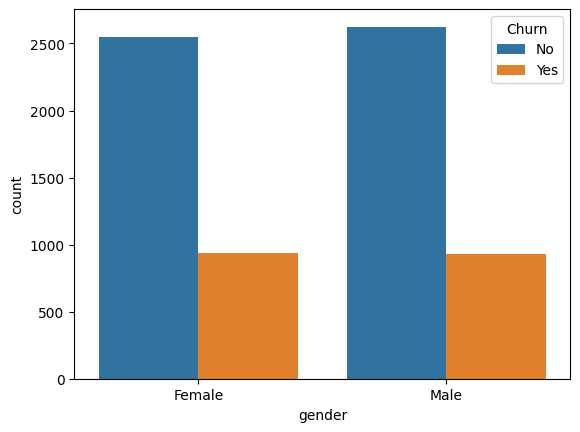

In [16]:
df.describe()

sns.countplot(x='gender', hue='Churn', data = df)

<Axes: xlabel='gender', ylabel='count'>

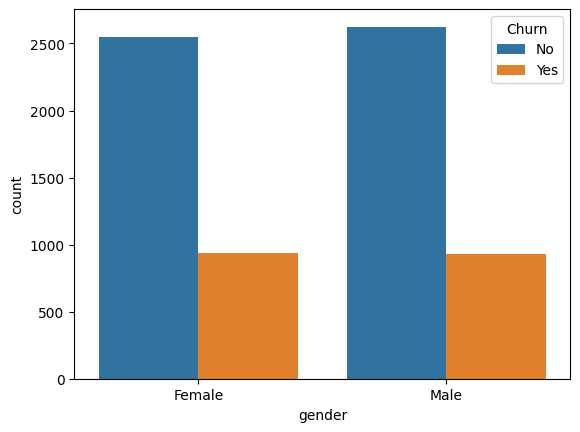

In [17]:
sns.countplot(x='gender', hue='Churn', data = df)


In [18]:
df['gender'].value_counts()


,count
gender,
Male,3555
Female,3488


<Axes: xlabel='MultipleLines', ylabel='count'>

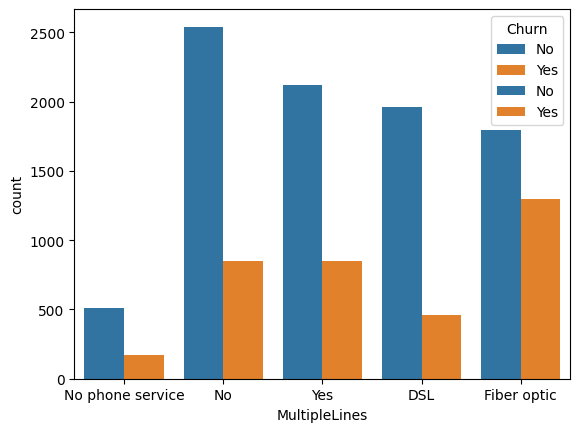

In [19]:
sns.countplot(x='MultipleLines', hue='Churn', data = df)
sns.countplot(x='InternetService', hue='Churn', data = df)

In [24]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
if df[column].dtype == np.number:
continue
df[column] = LabelEncoder().fit_transform(df[column])

df

x = df.drop('Churn',axis=1)
y = df['Churn']

IndentationError: expected an indented block after 'for' statement on line 3 (<ipython-input-24-c095454bf42d>, line 4)

In [25]:
from sklearn.preprocessing import StandardScaler
feature_x = StandardScaler().fit_transform(x)

feature_x

NameError: name 'x' is not defined

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(feature_x, y, test_size=.25,random_state=42)
xtest

NameError: name 'feature_x' is not defined

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

pred = model.predict(xtest)
pred

NameError: name 'xtrain' is not defined